In [27]:
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
targetULR_pimaIndiansDiabetes3 = "https://raw.githubusercontent.com/taehojo/data/master/pima-indians-diabetes3.csv"
df = pd.read_csv(targetULR_pimaIndiansDiabetes3)

데이터 시각화

In [29]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df["diabetes"].value_counts()   # 당뇨 환자가 몇명인지 확인

0    500
1    268
Name: diabetes, dtype: int64

In [31]:
df.describe() # 자료에 대해 더 자세한 정보

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
df.corr() # 각 항목이 어느 정도 상관관계를 가지고 있는지 확인

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


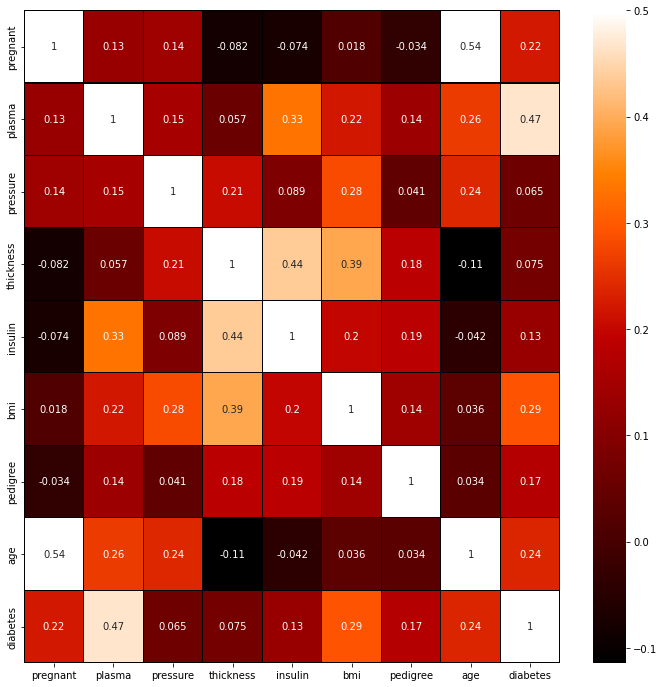

In [33]:
# 상관관계 그래프
colormap = plt.cm.gist_heat # 그래프 색상
plt.figure(figsize=(12,12)) # 그래프 크기

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='black', annot=True)
#vmax: 색상 밝기  cmap: 정해진 색상의 설정 값

plt.show()

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


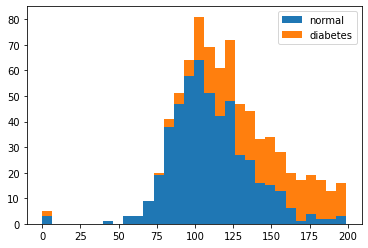

In [34]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
# 가저올 칼럼을 hist 함수 안에 x축으로 지정,(palsma 칼럼중 diabetes가 1과 0인 것을 구분해 불러옴)
# bins: x축을 몇개의 막대로 분할할지 지정 barstacked: 여러 데이터가 쌓인 막대바
# 불러온 데이터 이름을 각각 nomal과 diabetes로 지정

plt.legend()

BMI와 당뇨 사이에는 그래프를 통해 상관관계가 있어보인다.

In [35]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name="Dense_1"))
model.add(Dense(8, activation='relu', name="Dense_2"))
model.add(Dense(1, activation='sigmoid', name="Dense_3"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 2ms/step - loss: 2.2379 - accuracy: 0.5143
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 1.0316 - accuracy: 0.5820
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.5977
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6471
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6549
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.6654
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.6745
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.6719
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.6992
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.5807 - accura